In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
traindf=pd.read_csv('train.csv')
testdf=pd.read_csv('test.csv')

In [3]:
traindf.head(5)

,id,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,1,b,18.42,10.415,y,p,aa,v,0.125,t,f,0,f,g,120.0,375,1
1,2,a,21.75,11.750,u,g,c,v,0.250,f,f,0,t,g,180.0,0,1
2,3,b,30.17,1.085,y,p,c,v,0.040,f,f,0,f,g,170.0,179,1
3,4,b,22.67,2.540,y,p,c,h,2.585,t,f,0,f,g,0.0,0,0
4,5,a,36.00,1.000,u,g,c,v,2.000,t,t,11,f,g,0.0,456,0


In [4]:
testdf.head(5)

,id,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,553,b,29.17,3.500,u,g,w,v,3.500,t,t,3,t,g,329.0,0
1,554,b,28.33,5.000,u,g,w,v,11.000,t,f,0,t,g,70.0,0
2,555,b,29.25,14.790,u,g,aa,v,5.040,t,t,5,t,g,168.0,0
3,556,a,44.17,6.665,u,g,q,v,7.375,t,t,3,t,g,0.0,0
4,557,b,18.08,5.500,u,g,k,v,0.500,t,f,0,f,g,80.0,0


In [5]:
print(traindf.shape)
print(testdf.shape)

(552, 17)
(138, 16)


In [6]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 17 columns):
id    552 non-null int64
A     544 non-null object
B     543 non-null float64
C     552 non-null float64
D     547 non-null object
E     547 non-null object
F     545 non-null object
G     545 non-null object
H     552 non-null float64
I     552 non-null object
J     552 non-null object
K     552 non-null int64
L     552 non-null object
M     552 non-null object
N     541 non-null float64
O     552 non-null int64
P     552 non-null int64
dtypes: float64(4), int64(4), object(9)
memory usage: 73.4+ KB


In [7]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 16 columns):
id    138 non-null int64
A     134 non-null object
B     135 non-null float64
C     138 non-null float64
D     137 non-null object
E     137 non-null object
F     136 non-null object
G     136 non-null object
H     138 non-null float64
I     138 non-null object
J     138 non-null object
K     138 non-null int64
L     138 non-null object
M     138 non-null object
N     136 non-null float64
O     138 non-null int64
dtypes: float64(4), int64(3), object(9)
memory usage: 17.3+ KB


In [8]:
traindf.describe()

,id,B,C,H,K,N,O,P
count,552.000000,543.000000,552.000000,552.000000,552.000000,541.000000,552.000000,552.000000
mean,276.500000,31.364899,4.780136,2.259176,2.318841,175.162662,1087.576087,0.552536
std,159.492947,11.873665,4.938454,3.442564,4.297867,154.873746,5758.841945,0.497683
min,1.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,138.750000,22.500000,1.000000,0.165000,0.000000,60.000000,0.000000,0.000000
50%,276.500000,28.170000,2.750000,1.000000,0.000000,152.000000,3.500000,1.000000
75%,414.250000,37.665000,7.561250,2.750000,3.000000,268.000000,364.750000,1.000000
max,552.000000,80.250000,28.000000,28.500000,40.000000,1160.000000,100000.000000,1.000000


In [9]:
testdf.describe()

,id,B,C,H,K,N,O
count,138.000000,135.000000,138.000000,138.000000,138.000000,136.000000,138.000000
mean,621.500000,32.385778,4.673080,2.080326,2.724638,219.227941,736.623188
std,39.981246,12.301738,5.151458,2.938105,6.671399,231.864295,1742.379027
min,553.000000,15.830000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,587.250000,24.205000,0.970000,0.125000,0.000000,98.250000,0.000000
50%,621.500000,29.500000,2.750000,0.980000,0.000000,171.000000,8.500000
75%,655.750000,38.500000,5.781250,2.500000,3.000000,305.000000,500.000000
max,690.000000,76.750000,25.085000,13.875000,67.000000,2000.000000,11177.000000


We are seeing only those columns which are numeric as we can calculate the above statistics for those only.
First Thoughts Here.
1. We can remove the id column as its unnecessary and will not help us infer anything
2. See the Count row. There are some missing values in B and N column
3. The mean,max,min values of N and O is way large than others and therefore the data needs to be standardized/check for outliers at some point
4. But for column O the 50% of data falls below 3.5. Hence gives me a sense that this column has huge outliers, but for column N there may be few outliers as 75% data falls under 268 and mean is also 175.

In [10]:
print(traindf.isnull().sum())

id     0
A      8
B      9
C      0
D      5
E      5
F      7
G      7
H      0
I      0
J      0
K      0
L      0
M      0
N     11
O      0
P      0
dtype: int64


In [11]:
print(testdf.isnull().sum())

id    0
A     4
B     3
C     0
D     1
E     1
F     2
G     2
H     0
I     0
J     0
K     0
L     0
M     0
N     2
O     0
dtype: int64


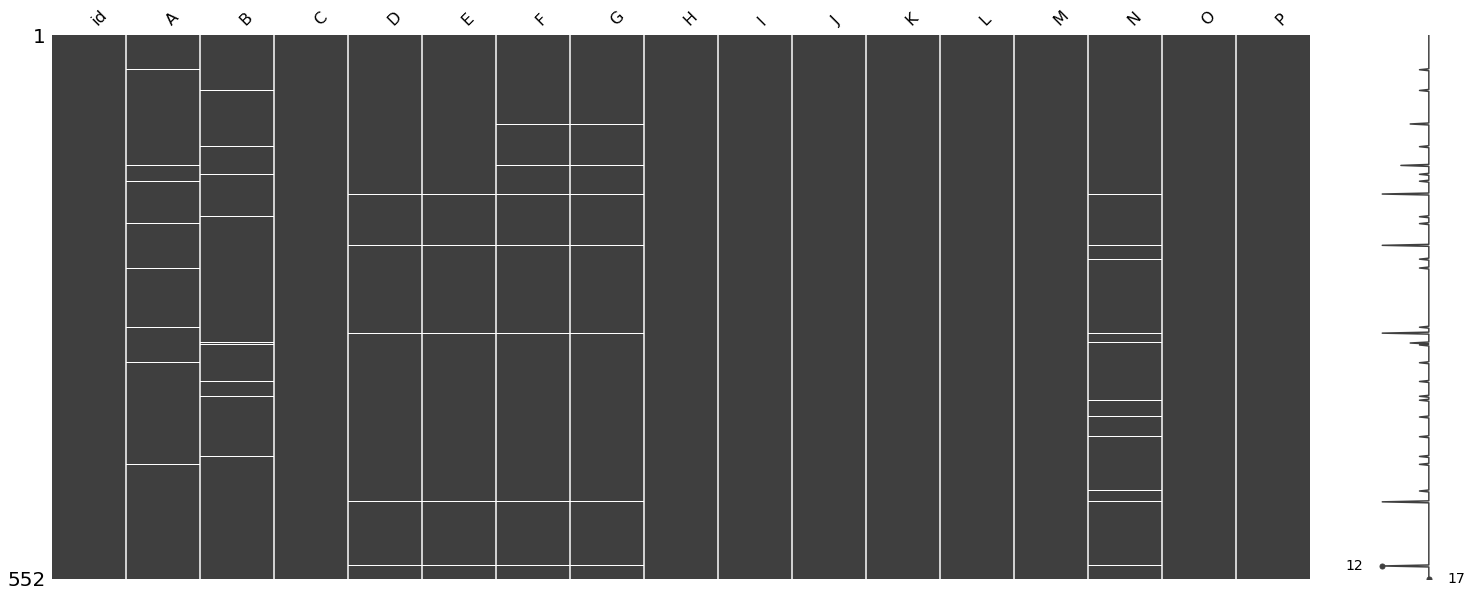

In [12]:
# This is some cool stuff to plot null values I have learned and each white horizontol line represents one null value
msno.matrix(traindf)

In [13]:
# Removing Null Values
traindf.dropna(axis=0,inplace=True)

In [14]:
testdf.dropna(axis=0,inplace=True)

In [15]:
print(traindf.shape)
print(testdf.shape)

(524, 17)
(129, 16)


In [16]:
# Removing Id Column
traindf.drop(['id'],inplace=True,axis=1)
testdf.drop(['id'],inplace=True,axis=1)

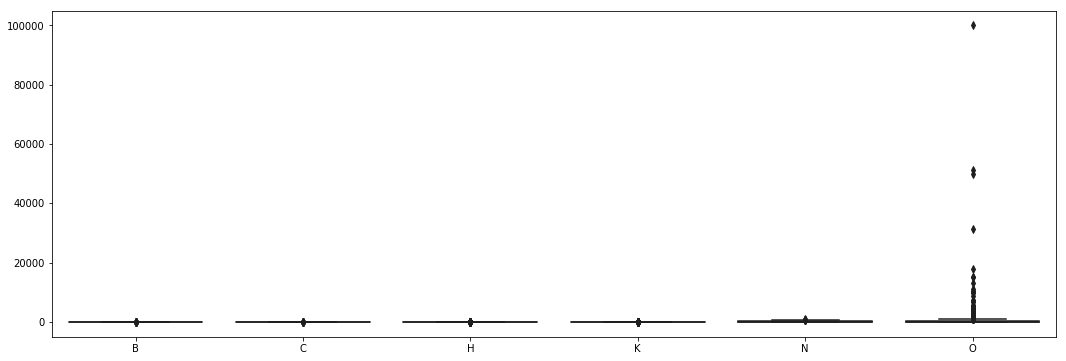

In [17]:
plt.figure(figsize=(18,6))
sns.boxplot(data=traindf[['B','C','H','K','N','O']],palette='twilight_r')

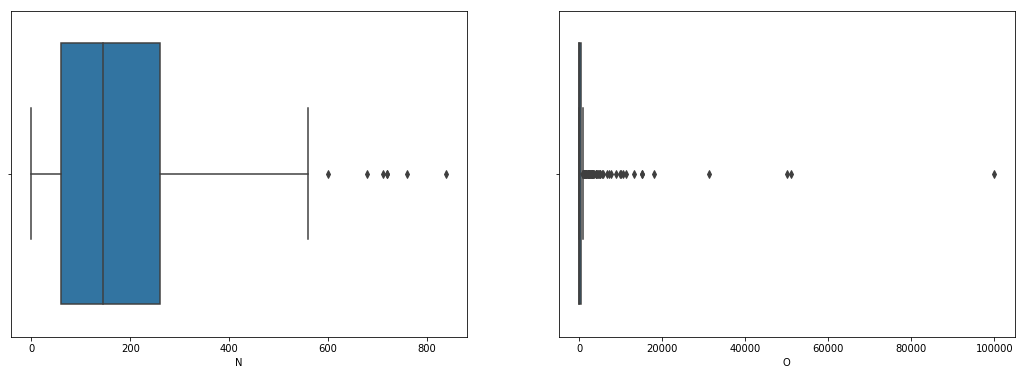

In [18]:
fig, ax = plt.subplots(figsize=(18,6), ncols=2, nrows=1,squeeze=False)

sns.boxplot(traindf['N'],ax=ax[0][0])
sns.boxplot(traindf['O'],ax=ax[0][1])

plt.show()

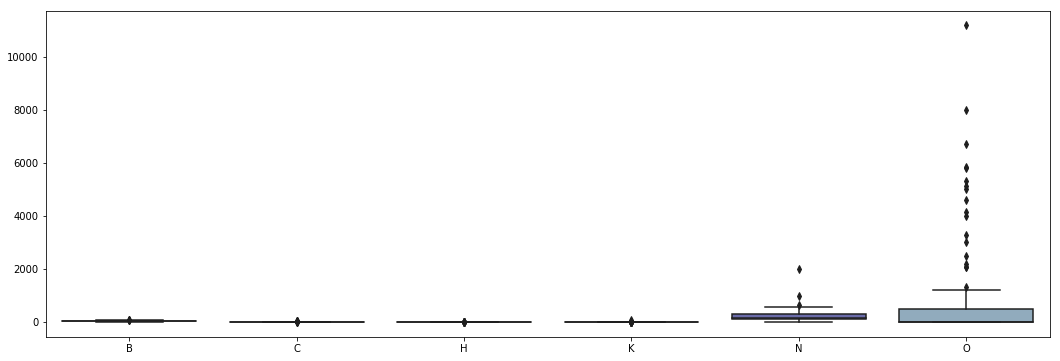

In [19]:
plt.figure(figsize=(18,6))
sns.boxplot(data=testdf[['B','C','H','K','N','O']],palette='twilight_r')

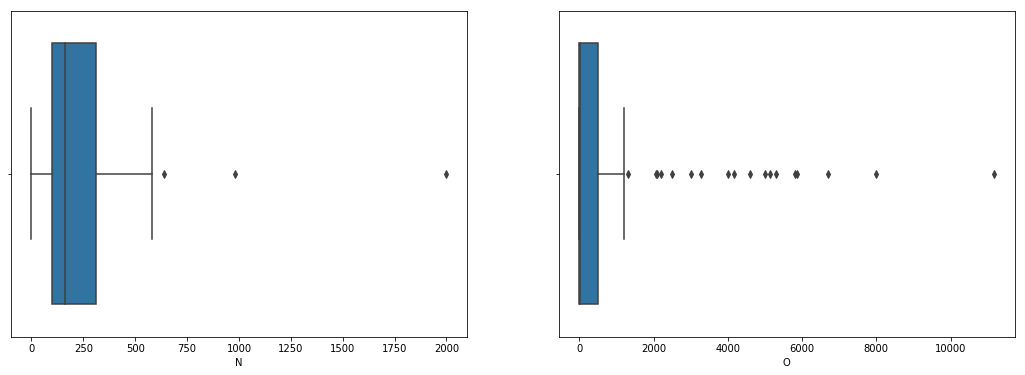

In [20]:
fig, ax = plt.subplots(figsize=(18,6), ncols=2, nrows=1,squeeze=False)

sns.boxplot(testdf['N'],ax=ax[0][0])
sns.boxplot(testdf['O'],ax=ax[0][1])

plt.show()


We can remove the outliers in 3 ways :-
1. Remove Using Z-Score but that assumes Normality and There is a case that there are such high outliers, the data will be skewed.
2. Using Interquartile Range/ Standard Deviation(Usually we will tae 3 Standard Deviation above the mean which cover's about 99% of the data)
3. By looking at the graph and  then finding the best suitable threshold of the column

In [21]:
# Removing Outliers

#traindf['N']=((traindf['N'] < (Q1 - 1.5 * IQR)) & (traindf['N'] > (Q3 + 1.5 * IQR)))

traindf['N']=traindf['N'][traindf['N'] < 590]
testdf['N']=testdf['N'][testdf['N'] < 590]

traindf['O']=traindf['O'][traindf['O'] < 1700]
testdf['O']=testdf['O'][testdf['O'] < 1700]

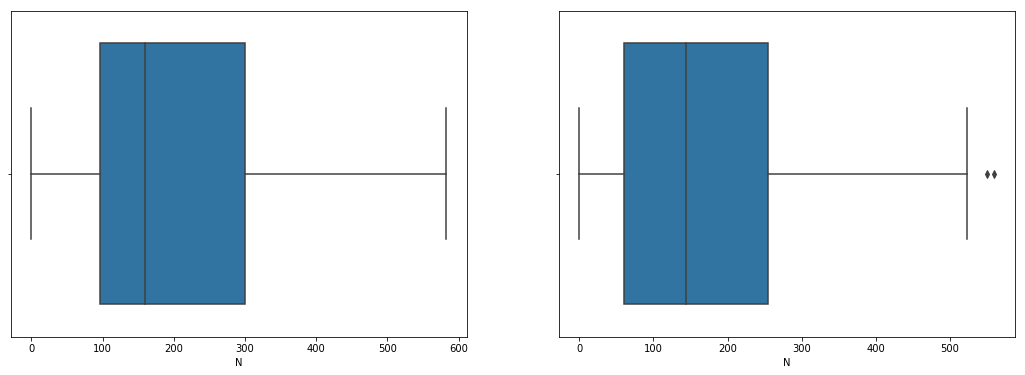

In [22]:
fig, ax = plt.subplots(figsize=(18,6), ncols=2, nrows=1,squeeze=False)

sns.boxplot(testdf['N'],ax=ax[0][0])
sns.boxplot(traindf['N'],ax=ax[0][1])

plt.show()

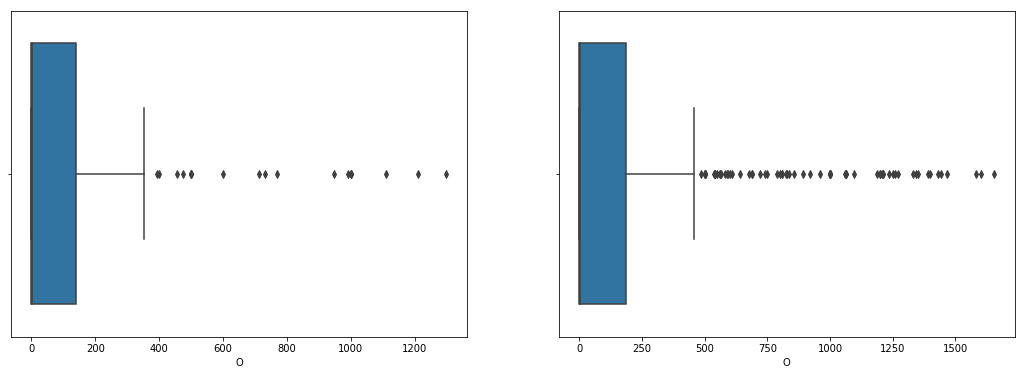

In [23]:
fig, ax = plt.subplots(figsize=(18,6), ncols=2, nrows=1,squeeze=False)

sns.boxplot(testdf['O'],ax=ax[0][0])
sns.boxplot(traindf['O'],ax=ax[0][1])

plt.show()

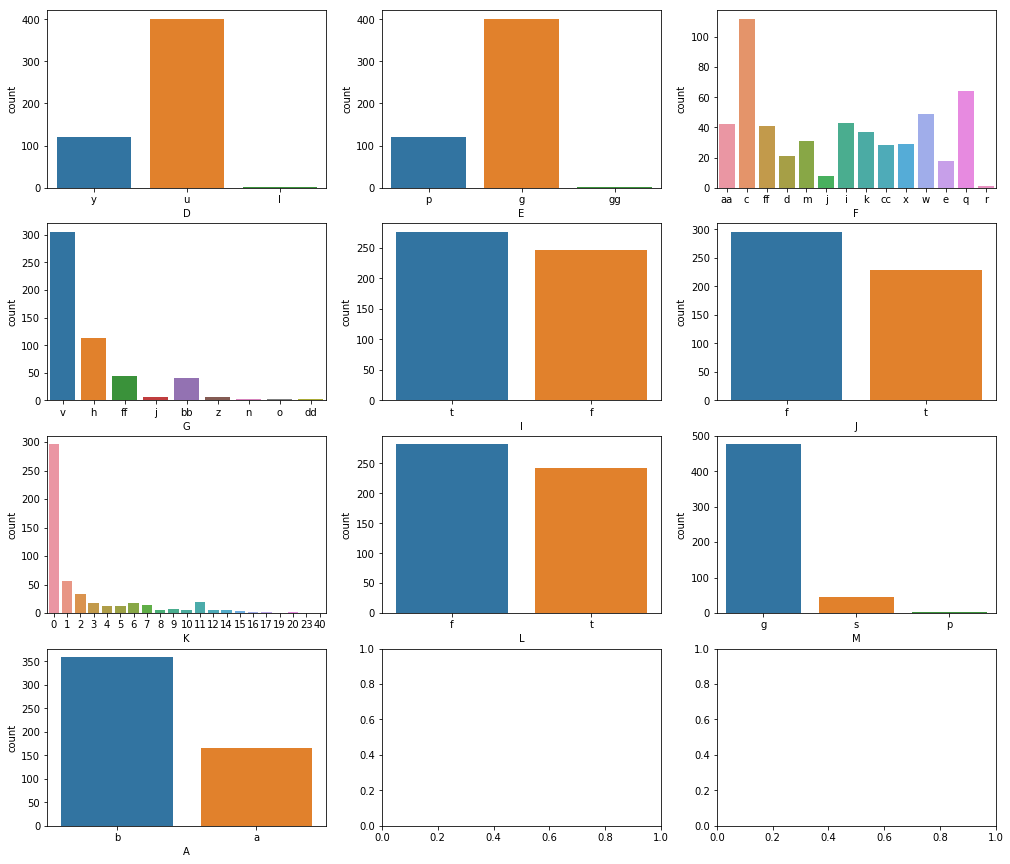

In [24]:
fig, ax = plt.subplots(figsize=(17,15), ncols=3, nrows=4)

sns.countplot(x=traindf['D'],ax=ax[0][0])
sns.countplot(x=traindf['E'],ax=ax[0][1])
sns.countplot(x=traindf['F'],ax=ax[0][2])
sns.countplot(x=traindf['G'],ax=ax[1][0])
sns.countplot(x=traindf['I'],ax=ax[1][1])
sns.countplot(x=traindf['J'],ax=ax[1][2])
sns.countplot(x=traindf['K'],ax=ax[2][0])
sns.countplot(x=traindf['L'],ax=ax[2][1])
sns.countplot(x=traindf['M'],ax=ax[2][2])
sns.countplot(x=traindf['A'],ax=ax[3][0])
plt.show()


To more columns D & E AND J & L seem pretty same. So i can remove 1 of each pair and I can confirm this once by looking at test data also. Since there is not much about the data I am taking my chances here. Since the total number of values for the same set of the data is also same we can say its the same value encoded differently.

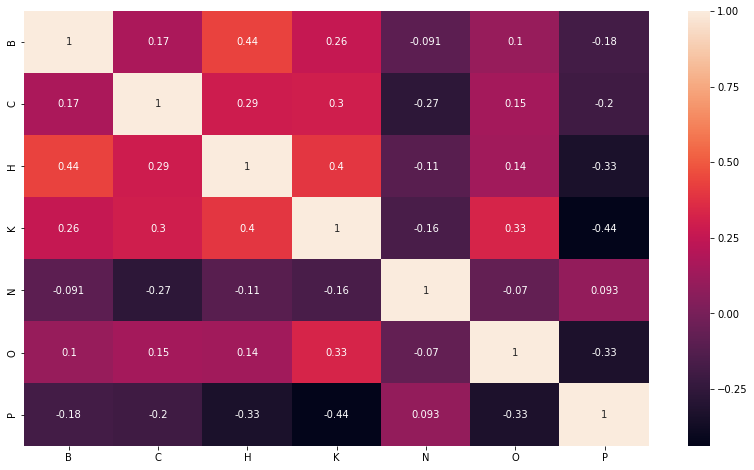

In [25]:
plt.figure(figsize=(14,8))
corr=traindf[['B','C','H','K','N','O','P']].corr()
sns.heatmap(corr,annot=True)

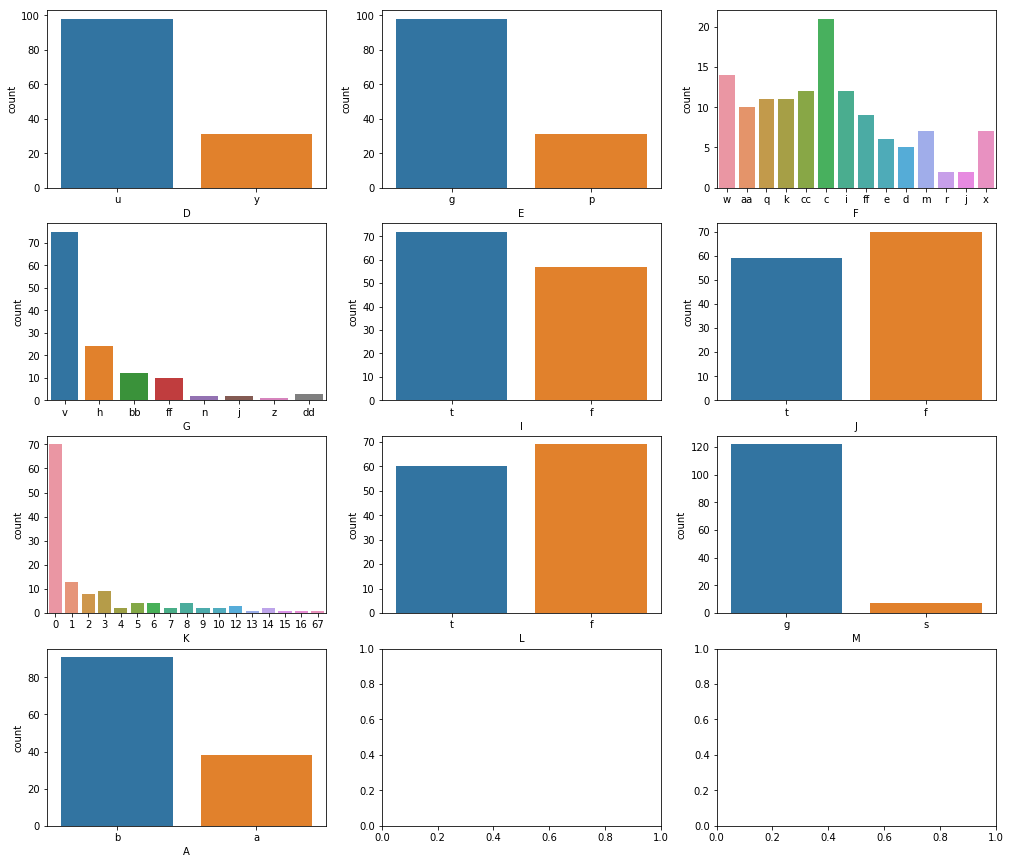

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(17,15), ncols=3, nrows=4)

sns.countplot(x=testdf['D'],ax=ax[0][0])
sns.countplot(x=testdf['E'],ax=ax[0][1])
sns.countplot(x=testdf['F'],ax=ax[0][2])
sns.countplot(x=testdf['G'],ax=ax[1][0])
sns.countplot(x=testdf['I'],ax=ax[1][1])
sns.countplot(x=testdf['J'],ax=ax[1][2])
sns.countplot(x=testdf['K'],ax=ax[2][0])
sns.countplot(x=testdf['L'],ax=ax[2][1])
sns.countplot(x=testdf['M'],ax=ax[2][2])
sns.countplot(x=testdf['A'],ax=ax[3][0])

plt.show()

In [27]:
traindf.dropna(axis=0,inplace=True)
testdf.dropna(axis=0,inplace=True)

In [28]:
print(traindf.shape)
print(testdf.shape)

(465, 16)
(110, 15)


In [29]:
traindf.drop(['L','E'],axis=1,inplace=True)
testdf.drop(['L','E'],axis=1,inplace=True)

C:\Users\priya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


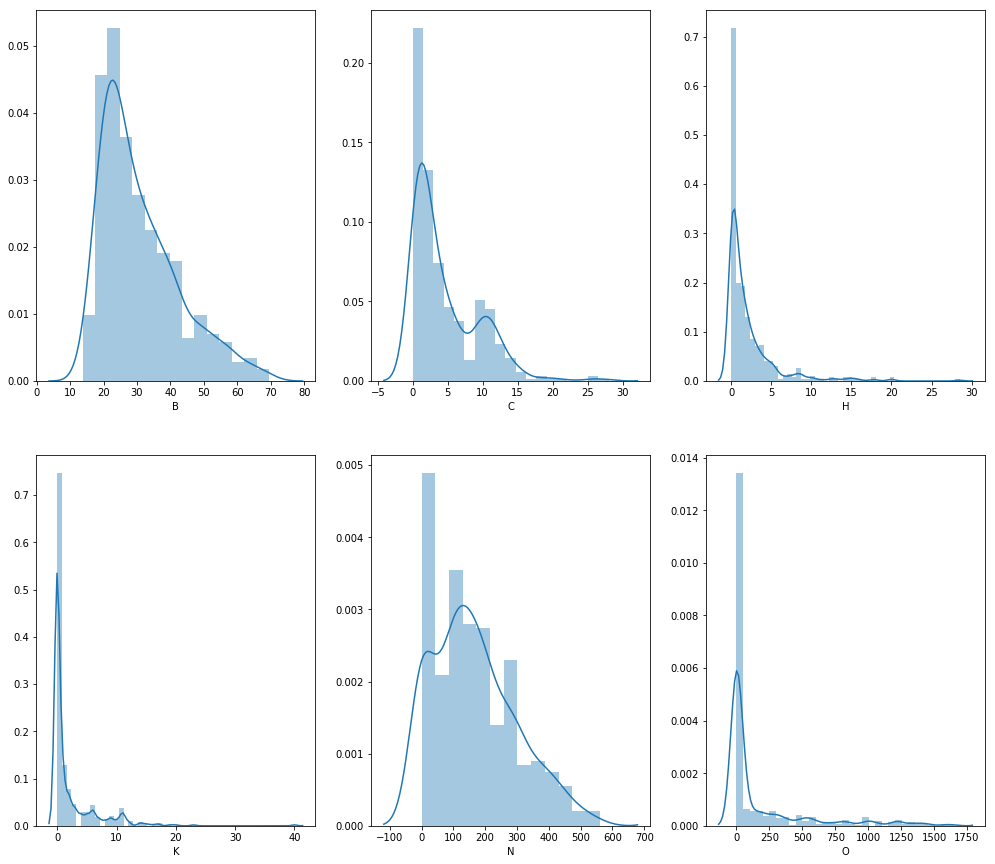

In [30]:
fig, ax = plt.subplots(figsize=(17,15), ncols=3, nrows=2)

sns.distplot(traindf['B'],ax=ax[0][0])
sns.distplot(traindf['C'],ax=ax[0][1])
sns.distplot(traindf['H'],ax=ax[0][2])
sns.distplot(traindf['K'],ax=ax[1][0])
sns.distplot(traindf['N'],ax=ax[1][1])
sns.distplot(traindf['O'],ax=ax[1][2])

plt.show()

In [31]:
y=traindf['P']

In [32]:
traindf.drop(['P'],axis=1,inplace=True)

In [33]:
df=traindf.append(testdf)

In [34]:
df.head(5)

,A,B,C,D,F,G,H,I,J,K,M,N,O
0,b,18.42,10.415,y,aa,v,0.125,t,f,0,g,120.0,375.0
1,a,21.75,11.750,u,c,v,0.250,f,f,0,g,180.0,0.0
2,b,30.17,1.085,y,c,v,0.040,f,f,0,g,170.0,179.0
3,b,22.67,2.540,y,c,h,2.585,t,f,0,g,0.0,0.0
4,a,36.00,1.000,u,c,v,2.000,t,t,11,g,0.0,456.0


In [35]:
from sklearn import preprocessing
traindf[['B','C','H','K','N','O']]=preprocessing.StandardScaler().fit_transform(traindf[['B','C','H','K','N','O']])
testdf[['B','C','H','K','N','O']]=preprocessing.StandardScaler().fit_transform(testdf[['B','C','H','K','N','O']])

C:\Users\priya\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\priya\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\priya\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\priya\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in ['A','D','F','G','I','J','K','M']:
    traindf[i]=le.fit_transform(traindf[i])
    testdf[i]=le.fit_transform(testdf[i])

In [37]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465 entries, 0 to 551
Data columns (total 13 columns):
A    465 non-null int32
B    465 non-null float64
C    465 non-null float64
D    465 non-null int32
F    465 non-null int32
G    465 non-null int32
H    465 non-null float64
I    465 non-null int32
J    465 non-null int32
K    465 non-null int64
M    465 non-null int32
N    465 non-null float64
O    465 non-null float64
dtypes: float64(5), int32(7), int64(1)
memory usage: 38.1 KB


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(traindf, y, test_size=0.33, random_state=42)

In [39]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


clf=LogisticRegression()
clf2=GridSearchCV(cv=None,estimator=LogisticRegression(C=1.0, intercept_scaling=1,   
            dual=False, fit_intercept=True, penalty='l2', tol=0.0001),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [42]:
clf.fit(X_train,y_train)
#clf2.fit((X_train,y_train))

pred=clf.predict(X_test)

print(classification_report(pred,y_test))


print(confusion_matrix(preds2,y_test))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82        70
           1       0.83      0.89      0.86        84

   micro avg       0.84      0.84      0.84       154
   macro avg       0.85      0.84      0.84       154
weighted avg       0.85      0.84      0.84       154

[[55 15]
 [ 9 75]]


C:\Users\priya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [43]:
from sklearn.metrics import f1_score
f1_score(y_test, pred, average='macro')  

0.8414822439526506

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(classification_report(pred,y_test))
f1_score(y_test, pred, average='macro') 

              precision    recall  f1-score   support

           0       0.61      0.83      0.70        47
           1       0.91      0.77      0.83       107

   micro avg       0.79      0.79      0.79       154
   macro avg       0.76      0.80      0.77       154
weighted avg       0.82      0.79      0.79       154



0.7675950061736865

In [45]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)
pred=svm.predict(X_test)
print(classification_report(pred,y_test))
f1_score(y_test, pred, average='macro')

              precision    recall  f1-score   support

           0       0.75      0.76      0.76        63
           1       0.83      0.82      0.83        91

   micro avg       0.80      0.80      0.80       154
   macro avg       0.79      0.79      0.79       154
weighted avg       0.80      0.80      0.80       154



C:\Users\priya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7923173967894898

In [48]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
pred=gnb.predict(X_test)
print(classification_report(pred,y_test))
f1_score(y_test, pred, average='macro')

              precision    recall  f1-score   support

           0       0.72      0.78      0.75        59
           1       0.86      0.81      0.83        95

   micro avg       0.80      0.80      0.80       154
   macro avg       0.79      0.80      0.79       154
weighted avg       0.80      0.80      0.80       154



0.7901999560536146

In [ ]:
clf.best_params_

clf.best_estimator_